In [ ]:
import numpy as np

from matplotlib import pyplot as plt

## Простейший случай градиентного спуска и изменение learning rate

*Разбор данного раздела:* https://youtu.be/4moZyfpauQY?t=2991

In [ ]:
given_data = np.random.normal(loc = 0, scale = 1, size = 5000) 
# получение 5000 точек из нормального распределения со средним = 0 и стандартным отклонением = 1

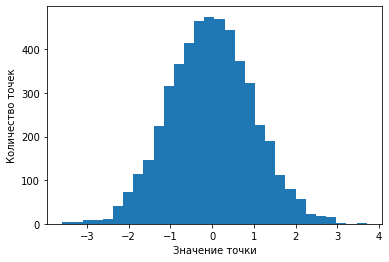

In [ ]:
plt.hist(given_data, bins = 30) # изображение полученных точек
plt.xlabel("Значение точки")
plt.ylabel("Количество точек")
plt.show()

In [ ]:
def RMSE(datapoint, values): # поиск среднеквадратического отклонения
    difference = values - datapoint # расстояние между точками
    difference = difference**2 # возведение в квадрат
    return difference.mean() ** 0.5 # поиск среднего и взятие корня

In [ ]:
x_values = np.linspace(-1.5, 1.5, 1000) # задаём значения, при которых считается ошибка
y_values = np.array([RMSE(x, given_data) for x in x_values]) # ищем значение ошибки в этих точках

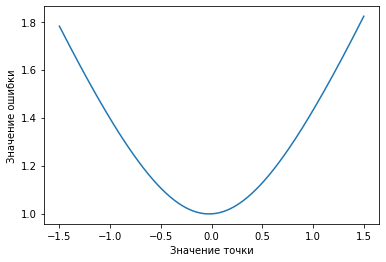

In [ ]:
plt.plot(x_values, y_values) # изображаем кривую ошибки
plt.xlabel("Значение точки")
plt.ylabel("Значение ошибки")
plt.show()

In [ ]:
def derivative(func, value, step = 1e-6): # функция для поиска производной в точке функции
    return (func(value + step) - func(value - step)) / (2 * step)

In [ ]:
initial_estimator = np.random.uniform(-1.5, 1.5) # берём случайную точку для начала поиска минимума 
current_estimator = initial_estimator
estim_log = [current_estimator] # создаём список, в котором будут храниться значения 
values_log = [RMSE(current_estimator, given_data)] # создаём список со значениями ошибок

RMSE_point = lambda x: RMSE(x, given_data) # функция для подсчёта RMSE на точке

learning_steps = 5
learning_rate = 0.9

for i in range(learning_steps):
    current_estimator -= derivative(RMSE_point, current_estimator) * learning_rate # шаг градиентного спуска
    estim_log.append(current_estimator) # добавляем информацию в логи
    values_log.append(RMSE(current_estimator, given_data))

In [ ]:
def draw_trajectory(x_values, y_values, estim_log, values_log):
    plt.plot(x_values, y_values) # изображаем кривую ошибки
    plt.plot(estim_log, values_log, marker='o') # изхображаем значения, через которые прошёл наш оптимизатор
    plt.legend(["Функция ошибки", "Путь оптимизатора"])
    plt.xlabel("Значение точки")
    plt.ylabel("Значение ошибки")
    plt.show()

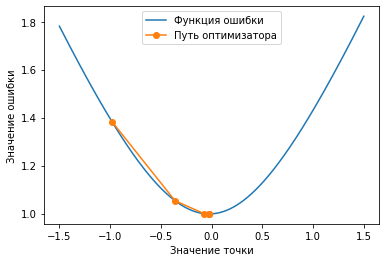

In [ ]:
draw_trajectory(x_values, y_values, estim_log, values_log)

In [ ]:
initial_estimator = np.random.uniform(-1.5, 1.5) # берём случайную точку для начала поиска минимума 
current_estimator = initial_estimator
estim_log = [current_estimator] # создаём список, в котором будут храниться значения 
values_log = [RMSE(current_estimator, given_data)] # создаём список со значениями ошибок

RMSE_point = lambda x: RMSE(x, given_data) # функция для подсчёта RMSE на точке

learning_steps = 5
learning_rate = 2

for i in range(learning_steps):
    current_estimator -= derivative(RMSE_point, current_estimator) * learning_rate # шаг градиентного спуска
    estim_log.append(current_estimator) # добавляем информацию в логи
    values_log.append(RMSE(current_estimator, given_data))

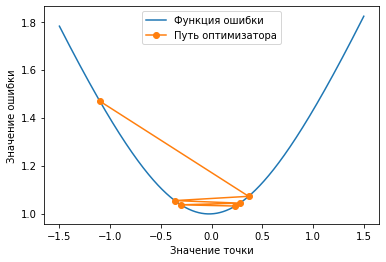

In [ ]:
draw_trajectory(x_values, y_values, estim_log, values_log)

In [ ]:
current_estimator = initial_estimator
estim_log = [current_estimator]
values_log = [RMSE(current_estimator, given_data)]

learning_steps = 5
learning_rate = 2

for i in range(learning_steps):
    current_learning_rate = learning_rate / (1 + i) # изменяем learning rate в зависимости от номера шага
    current_estimator -= derivative(RMSE_point, current_estimator) * current_learning_rate # шаг градиентного спуска
    estim_log.append(current_estimator) # добавляем информацию в логи
    values_log.append(RMSE(current_estimator, given_data))

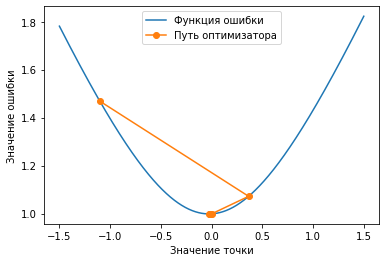

In [ ]:
draw_trajectory(x_values, y_values, estim_log, values_log)

## Adagrad и RMSprop

*Разбор данного раздела:* https://youtu.be/4moZyfpauQY?t=4023

In [ ]:
class Adagrad:
    def __init__(self, eps = 1e-06):
        self.cache = 0
        self.eps = eps

    def apply_grad(self, x, dx, learning_rate):
        self.cache = self.cache + dx ** 2 # добавление новой информации в кэш
        adapted_lr = learning_rate / (self.cache + self.eps) ** 0.5 # уменьшение шага в разных направлениях в зависимости от кэша
        return x - adapted_lr * dx 

In [ ]:
adagrad = Adagrad() # создаём оптимизатор Адаград

current_estimator = initial_estimator
estim_log = [current_estimator]
values_log = [RMSE(current_estimator, given_data)]

learning_steps = 5
learning_rate = 2

for i in range(learning_steps):
    derivative_val = derivative(RMSE_point, current_estimator)
    current_estimator = adagrad.apply_grad(current_estimator, # делаем шаг оптимизатора Адаград 
                                           derivative_val,
                                           learning_rate) 
    estim_log.append(current_estimator)
    values_log.append(RMSE(current_estimator, given_data))

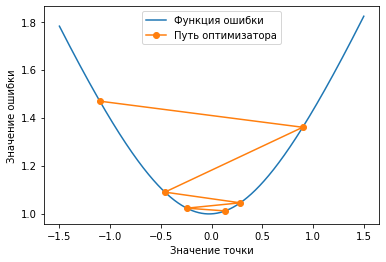

In [ ]:
draw_trajectory(x_values, y_values, estim_log, values_log)

In [ ]:
x_values = np.linspace(-500, 500, 100000) # задаём значения, при которых считается ошибка
y_values = np.array([RMSE(x, given_data) for x in x_values]) # ищем значение ошибки в этих точках

In [ ]:
initial_estimator = np.random.uniform(-400, -350) 
current_estimator = initial_estimator
estim_log = [current_estimator]
values_log = [RMSE(current_estimator, given_data)]

RMSE_point = lambda x: RMSE(x, given_data)

learning_steps = 50
learning_rate = 0.9

for i in range(learning_steps):
    current_estimator -= derivative(RMSE_point, current_estimator) * learning_rate
    estim_log.append(current_estimator)
    values_log.append(RMSE(current_estimator, given_data))

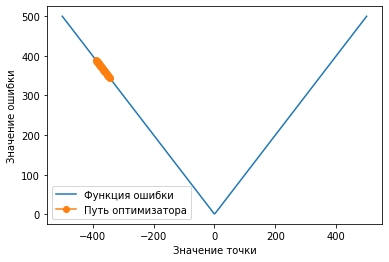

In [ ]:
draw_trajectory(x_values, y_values, estim_log, values_log)

In [ ]:
sgd_last = round(values_log[-1], 2)

In [ ]:
adagrad = Adagrad()

current_estimator = initial_estimator
estim_log = [current_estimator]
values_log = [RMSE(current_estimator, given_data)]

learning_steps = 50
learning_rate = 0.9

for i in range(learning_steps):
    derivative_val = derivative(RMSE_point, current_estimator)
    current_estimator = adagrad.apply_grad(current_estimator, 
                                           derivative_val,
                                           learning_rate) 
    estim_log.append(current_estimator)
    values_log.append(RMSE(current_estimator, given_data))

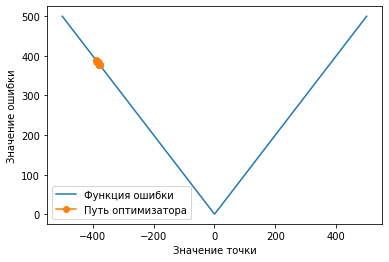

In [ ]:
draw_trajectory(x_values, y_values, estim_log, values_log)

In [ ]:
ada_last = round(values_log[-1], 2)

In [ ]:
class RMSprop:
    def __init__(self, decay_rate = 0.9, eps = 1e-06):
        self.decay_rate = decay_rate # скорость "затухания" кэша 
        self.cache = 0
        self.eps = eps

    def apply_grad(self, x, dx, learning_rate):
        self.cache = batchself.cache * self.decay_rate + (1 - self.decay_rate) * dx ** 2 # затухание кэша и увеличение засчёт текущего градиента
        adapted_lr = learning_rate / (self.cache + self.eps) ** 0.5
        return x - adapted_lr * dx

In [ ]:
rmsprop_optim = RMSprop() # создание RMSprop

current_estimator = initial_estimator
estim_log = [current_estimator]
values_log = [RMSE(current_estimator, given_data)]

learning_steps = 50
learning_rate = 0.9

for i in range(learning_steps):
    derivative_val = derivative(RMSE_point, current_estimator)
    current_estimator = rmsprop_optim.apply_grad(current_estimator, 
                                                 derivative_val,
                                                 learning_rate) 
    estim_log.append(current_estimator)
    values_log.append(RMSE(current_estimator, given_data))

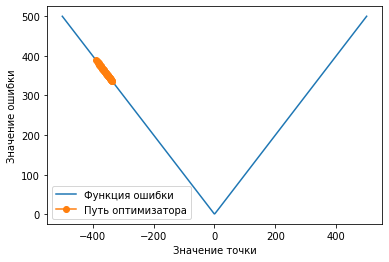

In [ ]:
draw_trajectory(x_values, y_values, estim_log, values_log)

In [ ]:
rms_last = round(values_log[-1], 2)

In [ ]:
print(f'Минимальная ошибка SGD: {sgd_last}')
print(f'Миимальная ошибка AdaGrad: {ada_last}')
print(f'Минимальная ошибка RMSprop: {rms_last}')

Минимальная ошибка SGD: 343.92
Миимальная ошибка AdaGrad: 377.44
Минимальная ошибка RMSprop: 335.71


## Локальный минимум

*Разбор данного раздела:* https://youtu.be/4moZyfpauQY?t=4337

In [ ]:
def loss_func(x):
    return np.sin(x) - x * 0.5

In [ ]:
x_values = np.linspace(-5, 5, 1000) # задаём значения, при которых считается ошибка
y_values = loss_func(x_values) # ищем значение ошибки в этих точках

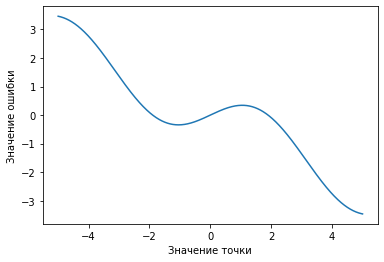

In [ ]:
plt.plot(x_values, y_values) # изображаем кривую ошибки
plt.xlabel("Значение точки")
plt.ylabel("Значение ошибки")
plt.show()

In [ ]:
# посмотрим на поведение градиентного спуска на данном примере

initial_estimator = np.random.uniform(-4, -2)
current_estimator = initial_estimator
estim_log = [current_estimator]
values_log = [loss_func(current_estimator)]

learning_steps = 5
learning_rate = 0.9

for i in range(learning_steps):
    current_estimator -= derivative(loss_func, current_estimator) * learning_rate
    estim_log.append(current_estimator)
    values_log.append(loss_func(current_estimator))

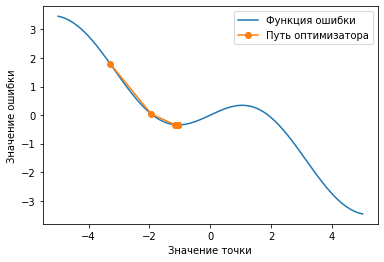

In [ ]:
draw_trajectory(x_values, y_values, estim_log, values_log)

## Моментум

*Разбор данного раздела:* https://youtu.be/4moZyfpauQY?t=4407

In [ ]:
class Momentum:
    def __init__(self, slowdown_rate = 0.9):
        self.v = 0 # скорость точки
        self.sd = slowdown_rate

    def apply_grad(self, x, dx, learning_rate):
        self.v = self.v * self.sd - learning_rate * dx # скорость сначала уменьшается, а затем растёт засчёт градиента в данной точке
        return x + self.v

In [ ]:
momentum_optimizer = Momentum()

current_estimator = initial_estimator
estim_log = [current_estimator]
values_log = [loss_func(current_estimator)]

learning_steps = 5
learning_rate = 0.9

for i in range(learning_steps):
    derivative_val = derivative(loss_func, current_estimator)
    current_estimator = momentum_optimizer.apply_grad(current_estimator, 
                                                      derivative_val,
                                                      learning_rate) 
    estim_log.append(current_estimator)
    values_log.append(loss_func(current_estimator))

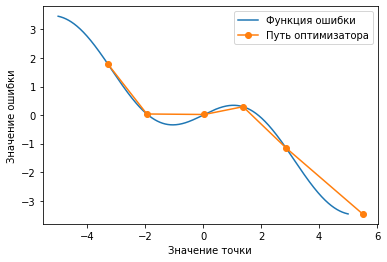

In [ ]:
draw_trajectory(x_values, y_values, estim_log, values_log)

## Адам

*Разбор данного раздела:* https://youtu.be/4moZyfpauQY?t=4588

In [ ]:
class Adam:
    def __init__(self, beta1 = 0.9, beta2= 0.999, eps = 1e-6):
        self.m = 0
        self.v = 0
        self.b1 = beta1 
        self.b2 = beta2
        self.eps = eps

    def apply_grad(self, x, dx, learning_rate):
        self.m = self.b1 * self.m + (1 - self.b1) * dx
        self.v = self.b2 * self.v + (1 - self.b2) * (dx**2)
        adapted_lr = learning_rate / (self.v + self.eps) ** 0.5 
        return x - adapted_lr * self.m

In [ ]:
momentum_optimizer = Adam()

current_estimator = initial_estimator
estim_log = [current_estimator]
values_log = [loss_func(current_estimator)]

learning_steps = 5
learning_rate = 0.7

for i in range(learning_steps):
    derivative_val = derivative(loss_func, current_estimator)
    current_estimator = momentum_optimizer.apply_grad(current_estimator, 
                                                      derivative_val,
                                                      learning_rate) 
    estim_log.append(current_estimator)
    values_log.append(loss_func(current_estimator))

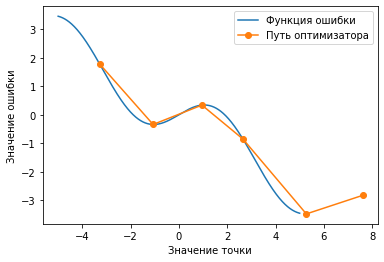

In [ ]:
draw_trajectory(x_values, y_values, estim_log, values_log)